In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as px
import plotly.express as px
%matplotlib inline

import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} cloumns in the dataset.')

There are 6435 rows and 8 cloumns in the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [7]:
print(f"There are {df.duplicated().sum()} duplicates values in the dataset.")

There are 0 duplicates values in the dataset.


In [8]:
# To check the number of uniques vales of all the columns.
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [9]:
# Seperatring the Day, Month, Year from the Date function and Droping the Date column.
df['Day'] = pd.DatetimeIndex(df.Date).day
df['Weeks'] = pd.DatetimeIndex(df.Date).week
df['Month'] = pd.DatetimeIndex(df.Date).month
df['Year'] = pd.DatetimeIndex(df.Date).year
df.drop('Date', axis=1, inplace=True)

In [10]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Weeks,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,18,5,2010


In [11]:
df.Day.value_counts()

2     270
3     270
6     270
25    225
10    225
24    225
17    225
9     225
27    225
20    225
13    225
8     225
19    225
7     225
18    225
30    225
26    225
16    225
23    225
4     225
5     180
14    180
28    180
21    180
15    180
22    180
29    180
11    180
12    180
31     90
1      90
Name: Day, dtype: int64

In [12]:
df.Month.value_counts()

4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: Month, dtype: int64

In [13]:
df.Year.value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [14]:
# To counts the number of Holidays i.e 0 = Yes, and 1 = No
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [15]:
# Consumer Price Index
df[['Weekly_Sales', "CPI"]].describe().round(2)

,Weekly_Sales,CPI
count,6435.00,6435.00
mean,1046964.88,171.58
std,564366.62,39.36
min,209986.25,126.06
25%,553350.10,131.74
50%,960746.04,182.62
75%,1420158.66,212.74
max,3818686.45,227.23


In [16]:
df.Fuel_Price.value_counts()

3.638    39
3.630    34
2.771    29
3.891    29
3.524    28
         ..
2.863     1
2.995     1
3.053     1
3.448     1
3.576     1
Name: Fuel_Price, Length: 892, dtype: int64

In [17]:
df.Weekly_Sales.nlargest(10)

1905    3818686.45
2763    3766687.43
1333    3749057.69
527     3676388.98
1762    3595903.20
1814    3556766.03
2815    3555371.03
475     3526713.39
1385    3487986.89
189     3436007.68
Name: Weekly_Sales, dtype: float64

In [18]:
# Total weekly sales of all the stores.
print(f" The total weekly sales of all the stores {df.Weekly_Sales.sum()}")

 The total weekly sales of all the stores 6737218987.11


In [19]:
# Average weekly sales
print(f"The average of all the stores is {df.Weekly_Sales.mean().round(2)}")

The average of all the stores is 1046964.88


In [20]:
print(f"The total number of Walmart stores are {df.Store.nunique()}.")

The total number of Walmart stores are 45.


In [21]:
# Highest weekly sales
# idxmax returns a Series with the index of the maximum value for each column
print(f"The Stores which has highely weekly sales is Store No.: {df.groupby('Store')['Weekly_Sales'].sum().idxmax()}")

The Stores which has highely weekly sales is Store No.: 20


In [22]:
# Lowest weekly sales
# idxmin returns a Series with the index of the minimum value for each column
print(f"The Stores which has highely weekly sales is Store No.: {df.groupby('Store')['Weekly_Sales'].sum().idxmin()}")

The Stores which has highely weekly sales is Store No.: 33


In [23]:
df.sample(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Weeks,Month,Year
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,10,50,12,2012
1553,11,1417875.42,0,84.97,3.393,225.264479,6.664,15,24,6,2012
186,2,2015781.27,0,49.33,2.708,211.265543,8.163,12,10,3,2010


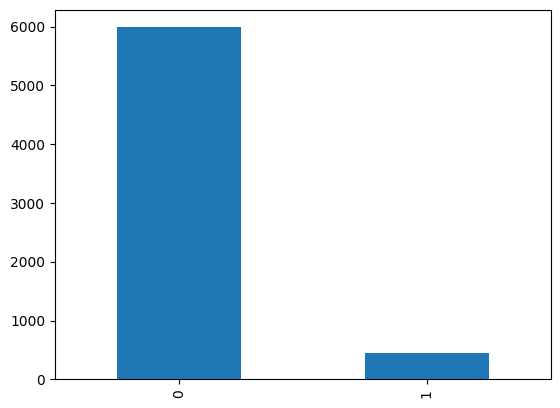

In [24]:
df.Holiday_Flag.value_counts().plot.bar();

In [25]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Weeks,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.650350,26.000000,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.753908,14.511794,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,14.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,26.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,38.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,52.000000,12.000000,2012.000000


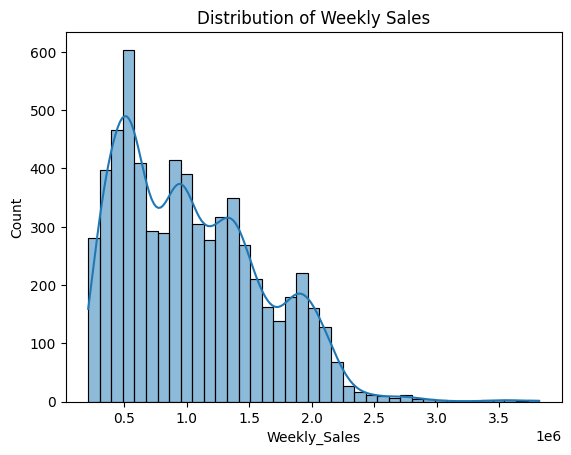

In [26]:
# plt.figure(figsize=(14,8))
sns.histplot(x = "Weekly_Sales", data = df, kde=True);
plt.title("Distribution of Weekly Sales");

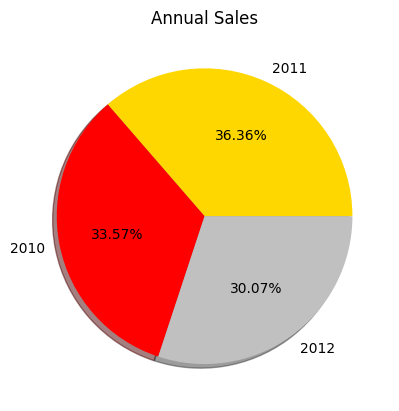

In [27]:
plt.pie(df.Year.value_counts().values, labels = df.Year.value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['gold','red',"silver"]);
plt.title('Annual Sales');

In [28]:
fig = px.pie(df, values=df['Weekly_Sales'], names=df['Year'], hover_data= ['Weekly_Sales'])
fig.update_traces(marker=dict( line=dict(color='#000000', width=2)))

fig.update_layout(
    title='Weekly Sales by Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Weekly Sales'))

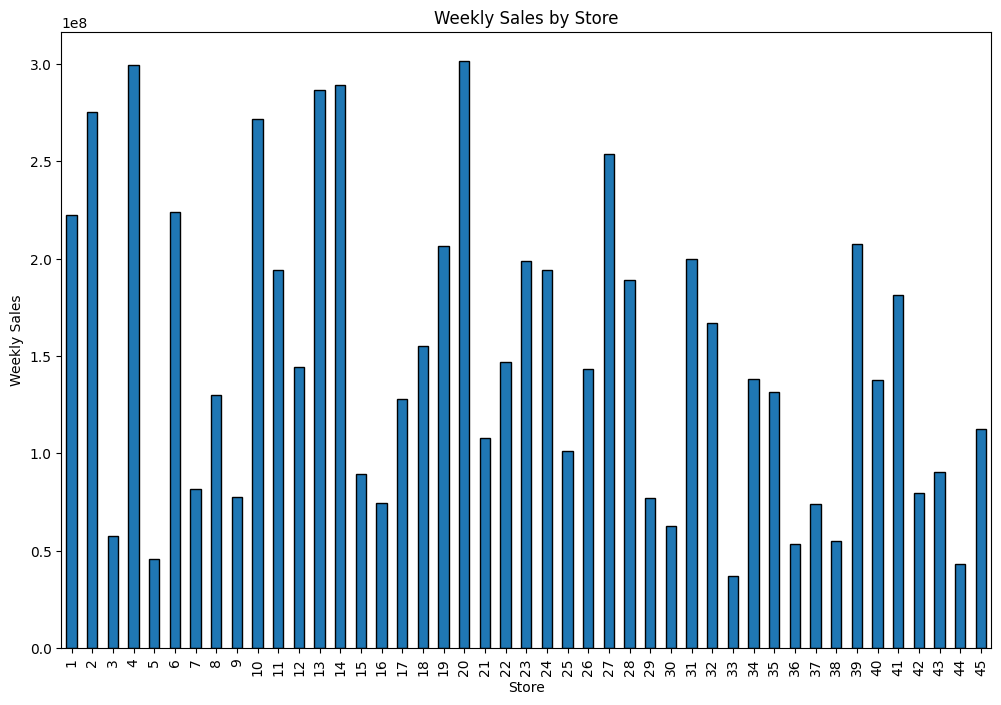

In [29]:
plt.figure(figsize=(12,8))
df.groupby('Store')['Weekly_Sales'].sum().plot(kind = 'bar', edgecolor = 'black')

plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Store');

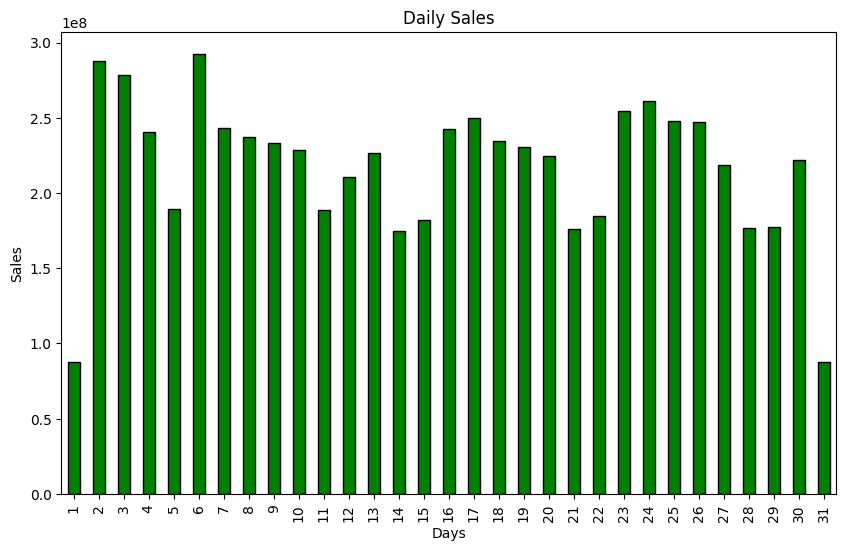

In [30]:
plt.figure(figsize=(10,6))
df.groupby('Day')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'g', edgecolor = 'black');

plt.xlabel('Days')
plt.ylabel("Sales")
plt.title('Daily Sales');

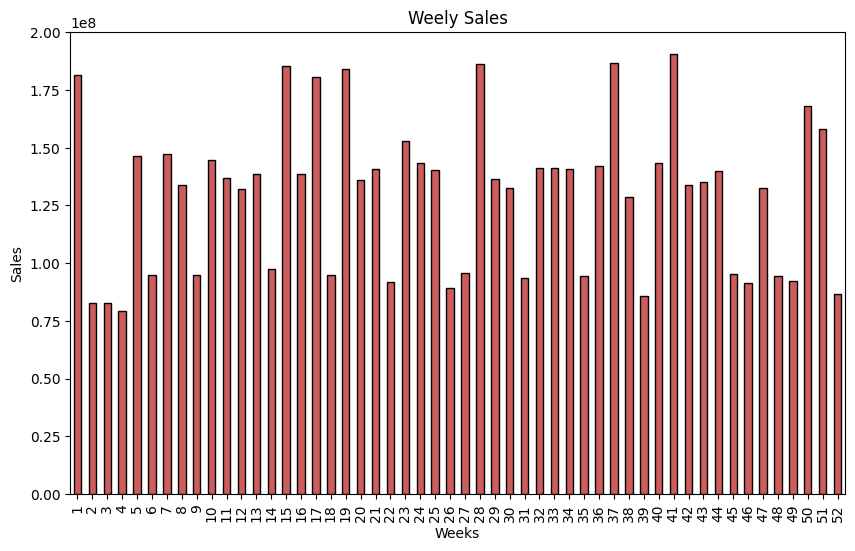

In [31]:
plt.figure(figsize=(10,6))
df.groupby('Weeks')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'indianred', edgecolor = 'black');

plt.title('Weely Sales')
plt.xlabel("Weeks")
plt.ylabel("Sales");

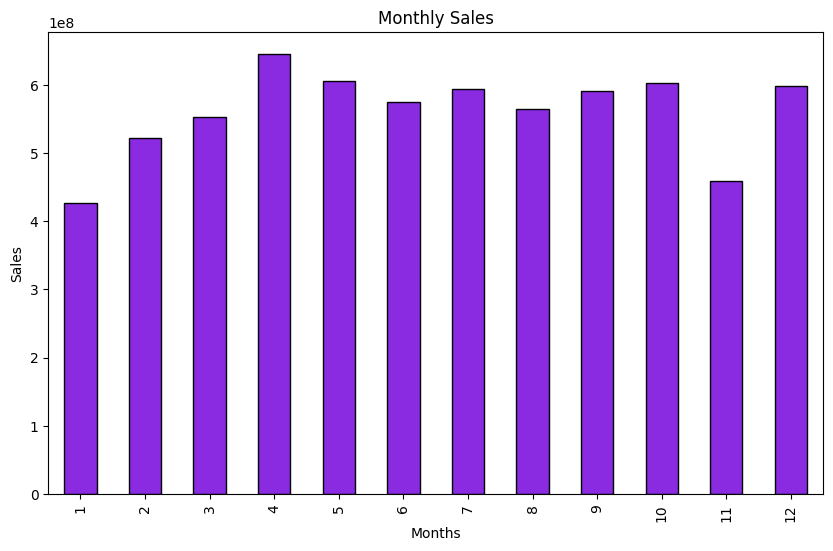

In [32]:
plt.figure(figsize = (10,6))
df.groupby('Month')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'blueviolet', edgecolor = 'black');

plt.title("Monthly Sales")
plt.xlabel('Months')
plt.ylabel("Sales");

In [33]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Weeks', 'Month', 'Year'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int64  
 8   Weeks         6435 non-null   int64  
 9   Month         6435 non-null   int64  
 10  Year          6435 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 553.1 KB


In [35]:
df.sample(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Weeks,Month,Year
4829,34,999298.43,0,48.09,3.707,130.826193,9.653,16,11,3,2012
1125,8,899449.65,0,78.85,3.346,225.355884,5.679,22,25,6,2012


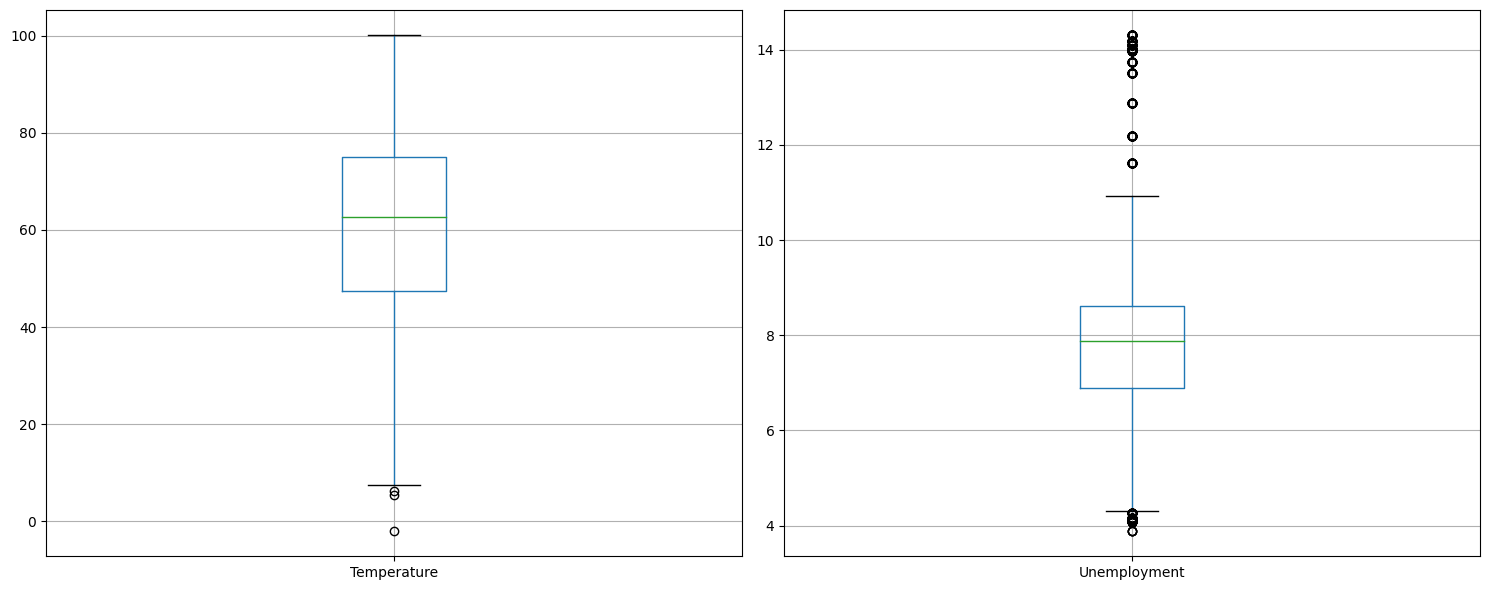

In [36]:
features = [ 'Temperature', 'Unemployment']
n = 2
plt.figure(figsize=[15,6*math.ceil(len(features)/n)])
for i in range(len(features)):
    plt.subplot(math.ceil(len(features)/3),n,i+1)
    df.boxplot(features[i])
plt.tight_layout()
plt.show()


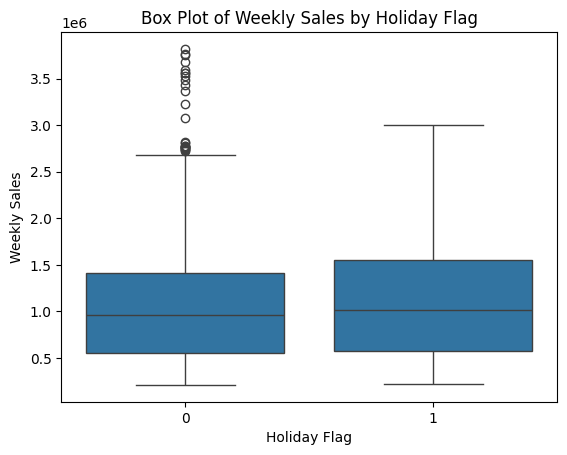

In [37]:
sns.boxplot(x = df.Holiday_Flag, y = df.Weekly_Sales);

plt.title('Box Plot of Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales');

In [38]:
# Removing the Outliers.
df1 = df.copy()

for i in features:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1

    df1 = df[df[i] <= (Q3 + (IQR * 1.5))]
    df1 = df[df[i] >= (Q1 - (IQR * 1.5))]
    df1 = df1.reset_index(drop = True)


display(df1.head())
print(f'{df.shape}')
print(f'{df1.shape}')

df = df1.copy()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Weeks,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,18,5,2010


(6435, 11)
(6332, 11)


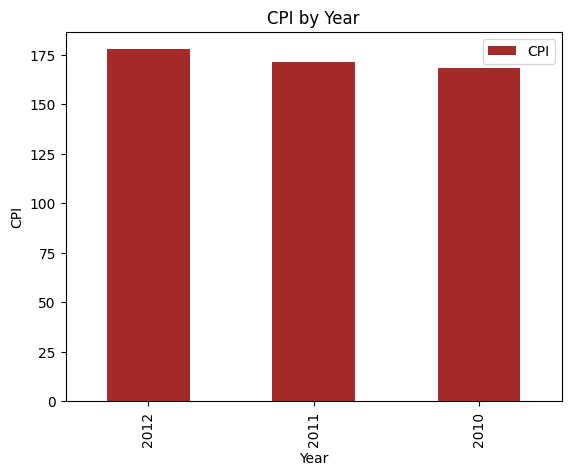

In [39]:
df[['Year', "CPI"]].groupby(['Year'],as_index=True).mean().sort_values(by='CPI',
                                    ascending=False).plot.bar(color = ['brown']);
plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI by Year');

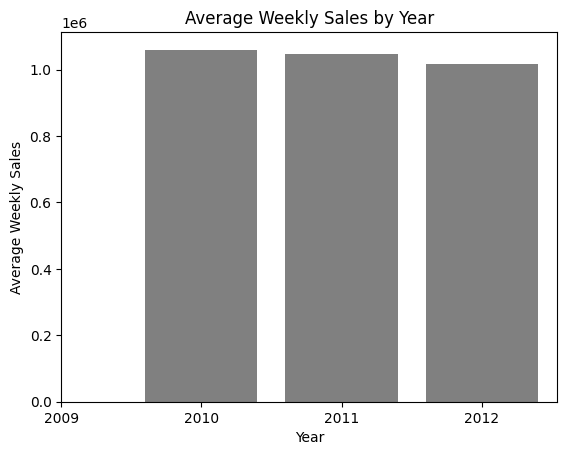

In [40]:
grouped_data = df[['Year', 'Weekly_Sales']].groupby(['Year'],
                as_index=True).mean().sort_values(by='Weekly_Sales', ascending=False)
x = grouped_data.index
heights = grouped_data['Weekly_Sales']

plt.bar(x, heights, color = "grey")

plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Year');

plt.xticks(range(2009,2013));

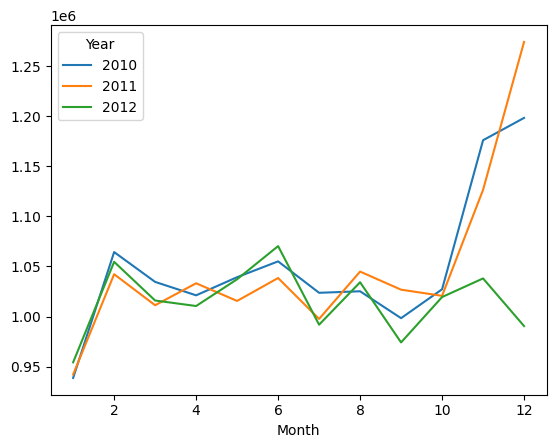

In [41]:
monthly_sales = pd.pivot_table(df, index = 'Month', columns = 'Year', values = 'Weekly_Sales');
monthly_sales.plot();

In [42]:
fig = px.pie(df, values=df['CPI'], names=df['Year'], hover_data= ['Year'])
fig.update_traces(marker=dict( line=dict(color='#000000', width=2)))


fig.update_layout(
    title='CPI by Year')

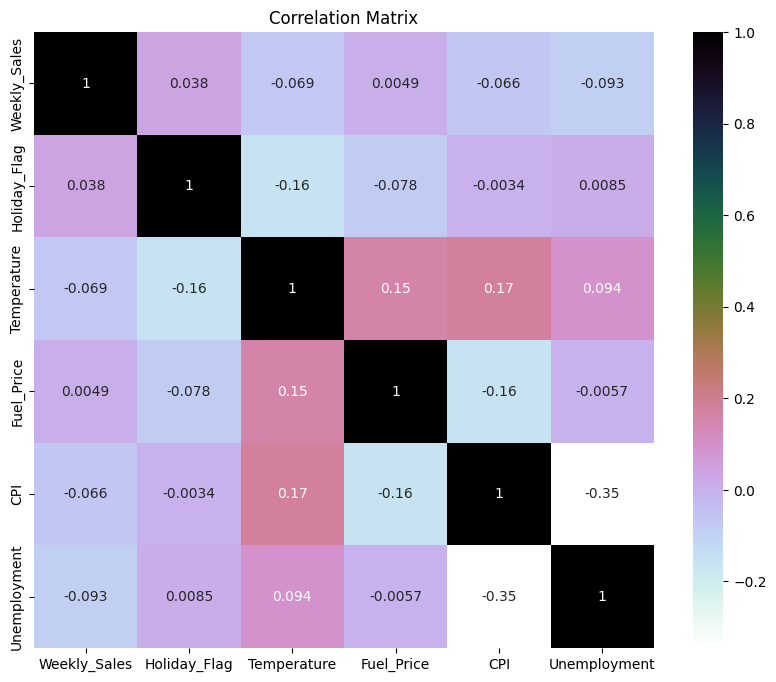

In [43]:
fig, ax = plt.subplots(figsize=(10,8))

corr = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='cubehelix_r', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

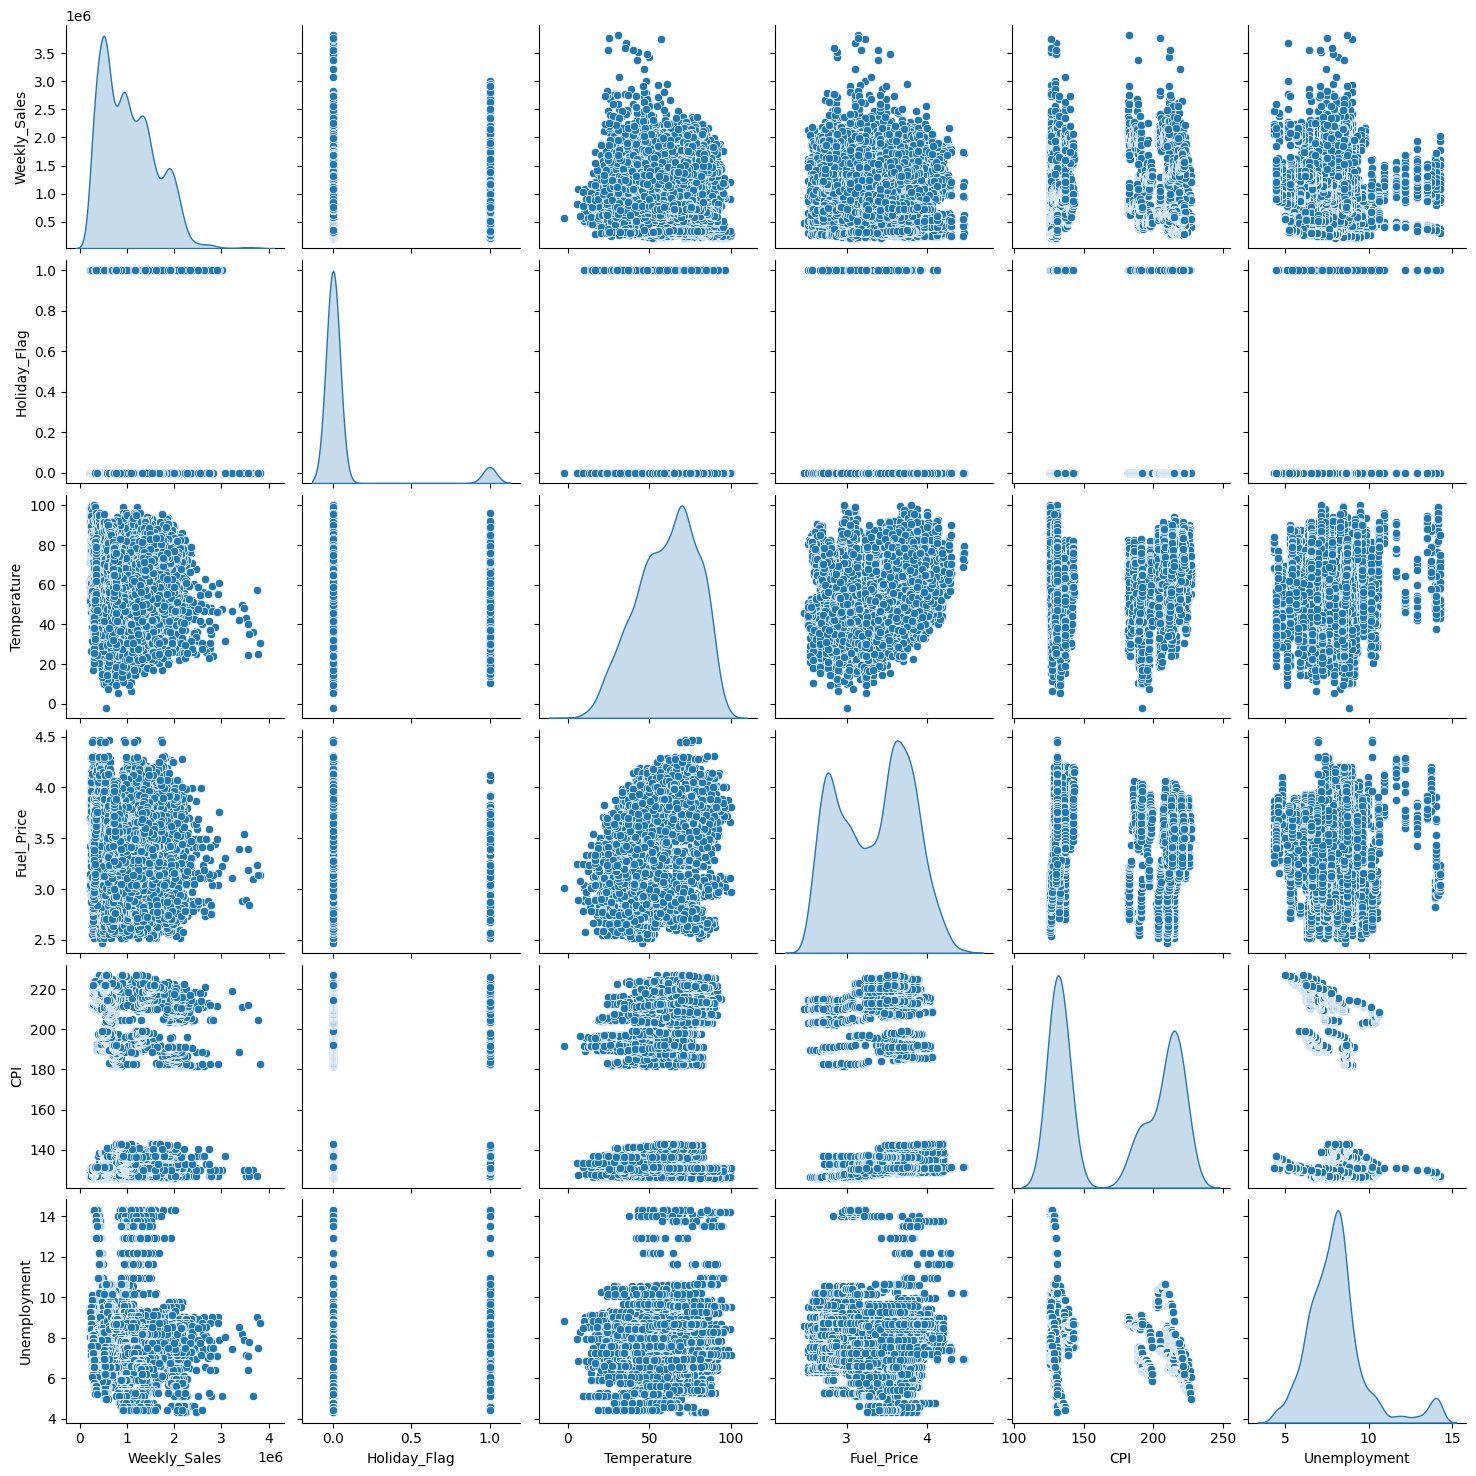

In [44]:
sns.pairplot(df [['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] ,diag_kind = 'kde');

In [45]:
# Reindexing the Weekly_Sales column for X, y split
df = df[[col for col in df.columns if col != 'Weekly_Sales']+ ['Weekly_Sales']]
df

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Weeks,Month,Year,Weekly_Sales
0,1,0,42.31,2.572,211.096358,8.106,2,17,5,2010,1643690.90
1,1,1,38.51,2.548,211.242170,8.106,2,48,12,2010,1641957.44
2,1,0,39.93,2.514,211.289143,8.106,19,7,2,2010,1611968.17
3,1,0,46.63,2.561,211.319643,8.106,26,8,2,2010,1409727.59
4,1,0,46.50,2.625,211.350143,8.106,3,18,5,2010,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...
6327,45,0,64.88,3.997,192.013558,8.684,28,39,9,2012,713173.95
6328,45,0,64.89,3.985,192.170412,8.667,10,19,5,2012,733455.07
6329,45,0,54.47,4.000,192.327265,8.667,10,50,12,2012,734464.36
6330,45,0,56.47,3.969,192.330854,8.667,19,42,10,2012,718125.53


In [46]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
print(f' The shape of x {X.shape},and y {y.shape}.')

 The shape of x (6332, 10),and y (6332,).


In [48]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_scaled = st.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=.30, random_state=42)

In [50]:
print('X_train shape is ' , X_train.shape)
print('y_train shape is ' , y_train.shape)

print('X_test shape is ' , X_test.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4432, 10)
y_train shape is  (4432,)
X_test shape is  (1900, 10)
y_test shape is  (1900,)


In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [52]:
def model(y_test,y_train,X_test,X_train,model):

    model1 = model()
    model1.fit(X_train,y_train)
    y_pred = model1.predict(X_test)
    r2_score(y_test, y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [53]:
x = [model(y_test,y_train,X_test,X_train,i) for i in [LinearRegression,Lasso,Ridge,
                                                      ElasticNet,RandomForestRegressor,DecisionTreeRegressor,
                                                      KNeighborsRegressor,GradientBoostingRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 274081741757.99994
MAE: 427169.52889829903
R2 : 15.86 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 274160037676.42554
MAE: 427227.0051011884
R2 : 15.83 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 274150193732.06613
MAE: 427220.952027967
R2 : 15.83 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 282185600122.5047
MAE: 438399.83788647776
R2 : 13.37 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 13713471019.550678
MAE: 62961.17939968421
R2 : 95.79 %
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 22749213915.835945
MAE: 79145.33567368421
R2 : 93.02 %
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------


[None, None, None, None, None, None, None, None]